In [46]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [47]:
df_2d = pd.read_csv("data_2d.csv")

In [48]:
mnist = pd.read_csv("mnist.csv")

In [49]:
print(mnist.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


In [50]:
X_mnist = mnist.drop('7', axis=1)
X_2d = df_2d.iloc[:, 1:]


In [51]:
scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)
X_2d_scaled = scaler.fit_transform(X_2d)

C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\3-KSvoo5Ur-py3.11\Lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\3-KSvoo5Ur-py3.11\Lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, n_init=10),
                 k=(2, 10))

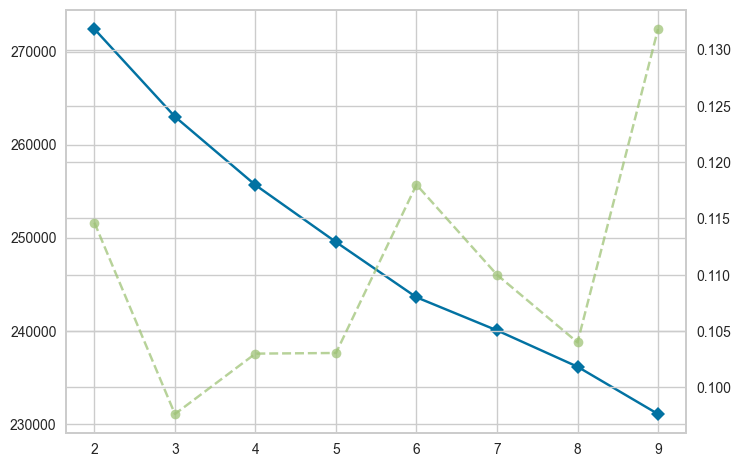

In [52]:
visualizer_mnist = KElbowVisualizer(KMeans(n_init=10), k=(2, 10))
visualizer_mnist.fit(X_mnist_scaled)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, n_init=10),
                 k=(2, 10))

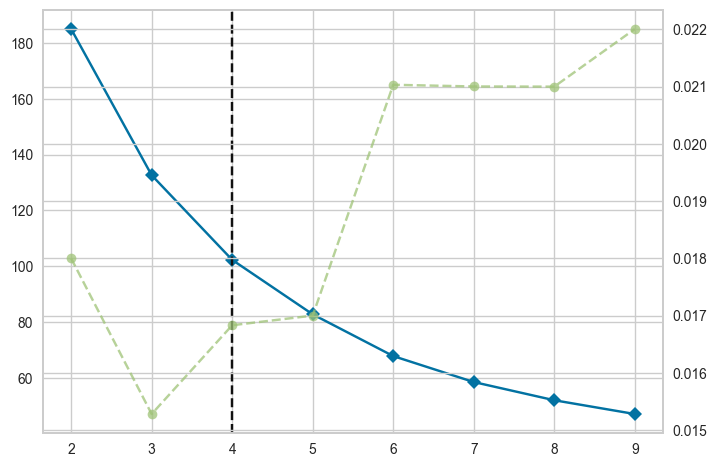

In [53]:
visualizer_2d = KElbowVisualizer(KMeans(n_init=10), k=(2, 10))
visualizer_2d.fit(X_2d_scaled)

In [54]:
visualizer_2d.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
optimal_clusters_mnist = visualizer_mnist.elbow_value_ or 3  
optimal_clusters_2d = visualizer_2d.elbow_value_ or 3 

In [63]:
kmeans_mnist = KMeans(n_clusters=optimal_clusters_mnist, n_init=10)
kmeans_2d = KMeans(n_clusters=optimal_clusters_2d, n_init=10)

In [64]:
mnist_clusters = kmeans_mnist.fit_predict(X_mnist_scaled)
clusters_2d = kmeans_2d.fit_predict(X_2d_scaled)

In [65]:
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist_scaled)

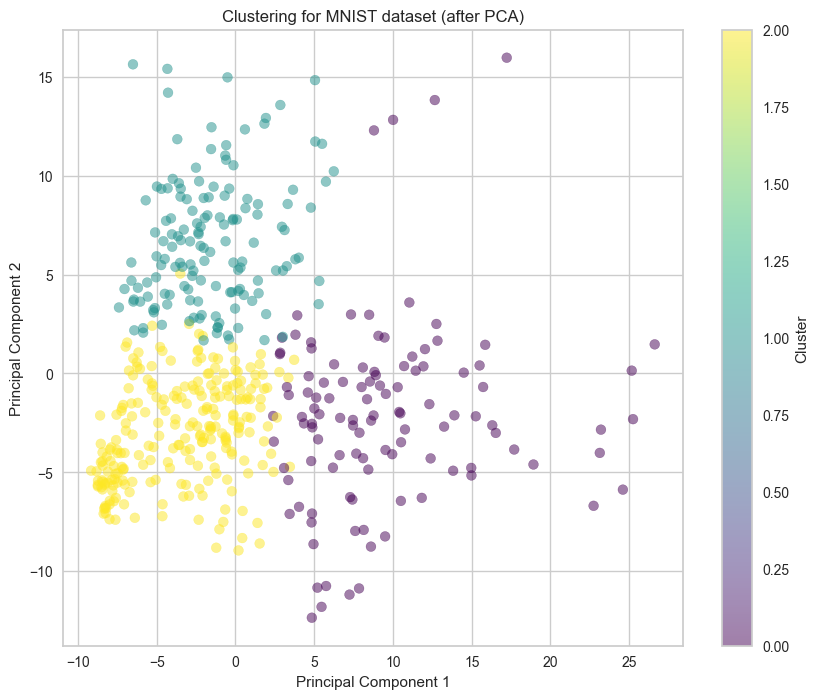

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=mnist_clusters, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering for MNIST dataset (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()